In [6]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import arch
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
yf.pdr_override()

In [8]:
class stock_vol:

	def __init__(self, tk, start, end):
		self.tk = tk
		self.start = start
		self.end = end
		all_data = pdr.get_data_yahoo(self.tk, start=self.start, end=self.end)
		self.stock_data = pd.DataFrame(all_data['Adj Close'], columns=["Adj Close"])
		self.stock_data["log"] = np.log(self.stock_data)-np.log(self.stock_data.shift(1))

	def mean_sigma(self):
		st = self.stock_data["log"].dropna().ewm(span=252).std()
		sigma = st.iloc[-1]
		return sigma

	def garch_sigma(self):
		model = arch.arch_model(self.stock_data["log"].dropna(), mean='Zero', vol='GARCH', p=1, q=1)
		model_fit = model.fit()
		forecast = model_fit.forecast(horizon=1)
		var = forecast.variance.iloc[-1]
		sigma = float(np.sqrt(var))
		return sigma

[*********************100%***********************]  1 of 1 downloaded
Date
2016-01-04    0.000855
2016-01-05   -0.025379
2016-01-06   -0.019764
2016-01-07   -0.043121
2016-01-08    0.005274
2016-01-11    0.016062
2016-01-12    0.014409
2016-01-13   -0.026046
2016-01-14    0.021635
2016-01-15   -0.024308
2016-01-19   -0.004851
2016-01-20    0.001344
2016-01-21   -0.005075
2016-01-22    0.051802
2016-01-25   -0.019716
2016-01-26    0.005516
2016-01-27   -0.067965
2016-01-28    0.007146
2016-01-29    0.033958
2016-02-01   -0.009393
2016-02-02   -0.020429
2016-02-03    0.019599
2016-02-04    0.008003
2016-02-05   -0.027071
2016-02-08    0.010475
2016-02-09   -0.000210
2016-02-10   -0.007609
2016-02-11   -0.006065
2016-02-12    0.003090
2016-02-16    0.027804
2016-02-17    0.015199
2016-02-18   -0.019138
2016-02-19   -0.002288
2016-02-22    0.008708
2016-02-23   -0.022864
2016-02-24    0.014781
2016-02-25    0.006844
2016-02-26    0.001549
2016-02-29   -0.002273
Name: log, dtype: float64


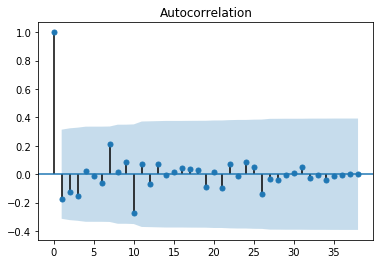

In [9]:
if __name__ == "__main__":
	vol = stock_vol("AAPL", start="2016-01-01", end="2016-03-01")
	test = vol.stock_data["log"].dropna()
	print(test)
	fig = plot_acf(test)
	plt.show()